In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
month_df = pd.read_csv('Electric_Production.csv')
month_df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


Level 1 Cleaning

In [4]:
month_df.columns = ['Date','Demand']
month_df.set_index(pd.to_datetime(month_df.Date,format='%m/%d/%Y'),inplace=True)
month_df.drop(columns=['Date'],inplace=True)

In [5]:
month_df

,Demand
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


Level 2 cleaning

In [6]:
attributes_dic={'IA1':'Average demand of the month',
            'IA2':'Slope of change for the demand of the month',
            'IA3': 'Average demands of months t-2, t-3 and t-4',
            'DA': 'Demand of month t'}
predict_df = pd.DataFrame(index=month_df.iloc[24:].index,columns=attributes_dic.keys())

In [7]:
predict_df

,IA1,IA2,IA3,DA
Date,,,,
1987-01-01,NaN,NaN,NaN,NaN
1987-02-01,NaN,NaN,NaN,NaN
1987-03-01,NaN,NaN,NaN,NaN
1987-04-01,NaN,NaN,NaN,NaN
1987-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2017-09-01,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN,NaN


In [8]:
predict_df.DA = month_df.loc['1987-01-01':].Demand
predict_df

,IA1,IA2,IA3,DA
Date,,,,
1987-01-01,NaN,NaN,NaN,73.8152
1987-02-01,NaN,NaN,NaN,70.0620
1987-03-01,NaN,NaN,NaN,65.6100
1987-04-01,NaN,NaN,NaN,60.1586
1987-05-01,NaN,NaN,NaN,58.8734
...,...,...,...,...
2017-09-01,NaN,NaN,NaN,98.6154
2017-10-01,NaN,NaN,NaN,93.6137
2017-11-01,NaN,NaN,NaN,97.3359


In [9]:
month_df['Month'] = list(map(lambda v:v.month, month_df.index))

In [10]:
month_df

,Demand,Month
Date,,
1985-01-01,72.5052,1
1985-02-01,70.6720,2
1985-03-01,62.4502,3
1985-04-01,57.4714,4
1985-05-01,55.3151,5
...,...,...
2017-09-01,98.6154,9
2017-10-01,93.6137,10
2017-11-01,97.3359,11


In [11]:
def ComputeIA1(r):
    row_date = r.name
    wdf = month_df.loc[:row_date].iloc[:-1]
    BM = wdf.Month == row_date.month
    return wdf[BM].Demand.mean()

predict_df.IA1 = predict_df.apply(ComputeIA1,axis=1)

In [12]:
predict_df

,IA1,IA2,IA3,DA
Date,,,,
1987-01-01,72.905450,NaN,NaN,73.8152
1987-02-01,69.329450,NaN,NaN,70.0620
1987-03-01,62.336150,NaN,NaN,65.6100
1987-04-01,57.252150,NaN,NaN,60.1586
1987-05-01,55.564400,NaN,NaN,58.8734
...,...,...,...,...
2017-09-01,86.105297,NaN,NaN,98.6154
2017-10-01,79.790228,NaN,NaN,93.6137
2017-11-01,82.692128,NaN,NaN,97.3359


using linear regression to fill out IA2

In [13]:
from sklearn.linear_model import LinearRegression
def ComputeIA2(r):
    row_date = r.name
    wdf = month_df.loc[:row_date].iloc[:-1]
    BM = wdf.Month == row_date.month
    wdf = wdf[BM]
    wdf.reset_index(drop=True,inplace=True)
    wdf.drop(columns = ['Month'],inplace=True)
    wdf['integer'] = range(len(wdf))
    wdf['ones'] = 1

    lm = LinearRegression()
    lm.fit(wdf.drop(columns=['Demand']), wdf.Demand)
    return lm.coef_[0]

predict_df.IA2 = predict_df.apply(ComputeIA2,axis=1)

In [14]:
predict_df

,IA1,IA2,IA3,DA
Date,,,,
1987-01-01,72.905450,0.800500,NaN,73.8152
1987-02-01,69.329450,-2.685100,NaN,70.0620
1987-03-01,62.336150,-0.228100,NaN,65.6100
1987-04-01,57.252150,-0.438500,NaN,60.1586
1987-05-01,55.564400,0.498600,NaN,58.8734
...,...,...,...,...
2017-09-01,86.105297,1.378406,NaN,98.6154
2017-10-01,79.790228,1.185773,NaN,93.6137
2017-11-01,82.692128,1.190510,NaN,97.3359


Slope = 1.1857728189149568


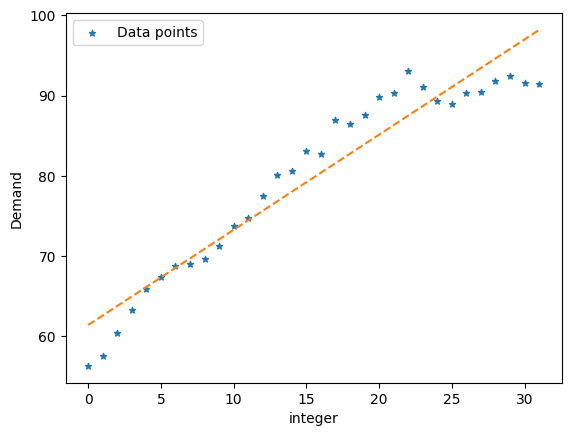

In [15]:
row_date = '2017-10-01'
wdf = month_df.loc[:row_date].iloc[:-1]
BM = wdf.Month == 10
wdf = wdf[BM]
wdf.reset_index(drop=True,inplace=True)
wdf.drop(columns = ['Month'],inplace=True)
wdf['integer'] = range(len(wdf))
wdf['ones'] = 1

lm = LinearRegression()
lm.fit(wdf.drop(columns=['Demand']), wdf.Demand)
print('Slope = {}'.format(lm.coef_[0]))

wdf.plot.scatter(x='integer',y='Demand',marker='*',
                 label='Data points',c='C0')

b = lm.intercept_
a = lm.coef_[0]

X = wdf.integer
y = b + a*X

plt.plot(X,y,label = 'Fitted regression',linestyle='--',c='C1')
plt.show()

IA3

In [16]:
def ComputeIA3(r):
    row_date = r.name
    wdf = month_df.loc[:row_date].iloc[-5:-2]
    return wdf.Demand.mean()

predict_df.IA3 = predict_df.apply(ComputeIA3,axis=1)

In [17]:
predict_df

,IA1,IA2,IA3,DA
Date,,,,
1987-01-01,72.905450,0.800500,59.291467,73.8152
1987-02-01,69.329450,-2.685100,61.669767,70.0620
1987-03-01,62.336150,-0.228100,67.097433,65.6100
1987-04-01,57.252150,-0.438500,70.670867,60.1586
1987-05-01,55.564400,0.498600,69.829067,58.8734
...,...,...,...,...
2017-09-01,86.105297,1.378406,102.129167,98.6154
2017-10-01,79.790228,1.185773,107.746067,93.6137
2017-11-01,82.692128,1.190510,106.566800,97.3359
